<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Edible Vs Poisonous Mushrooms :</font></h3>
    


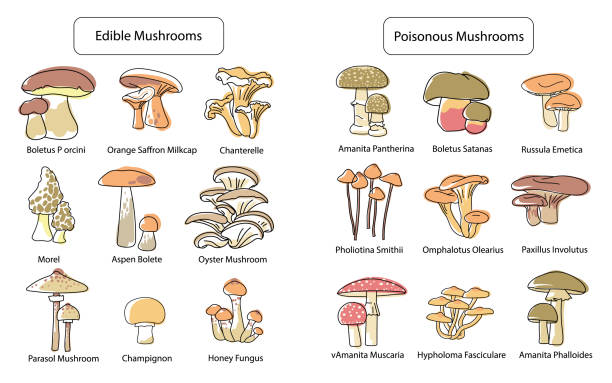

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: To develop a model that can classify mushrooms as edible ('e') or poisonous ('p') using a set of physical attributes provided in the dataset.

**Dataset**: Training Dataset (train.csv): Contains features along with the target variable, indicating whether each mushroom is edible or poisonous.Test Dataset (test.csv): Contains the features but requires predictions for whether the mushrooms are edible or poisonous.Additional Information:
    
**Evaluation**: The performance of the model is evaluated using the Matthews correlation coefficient (MCC), a metric that balances true and false positives and negatives, providing a measure of the quality of binary classifications.

The dataset was generated from a deep learning model trained on the UCI Mushroom dataset.

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import gc
import lightgbm as lgb


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Evalaution Metric</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

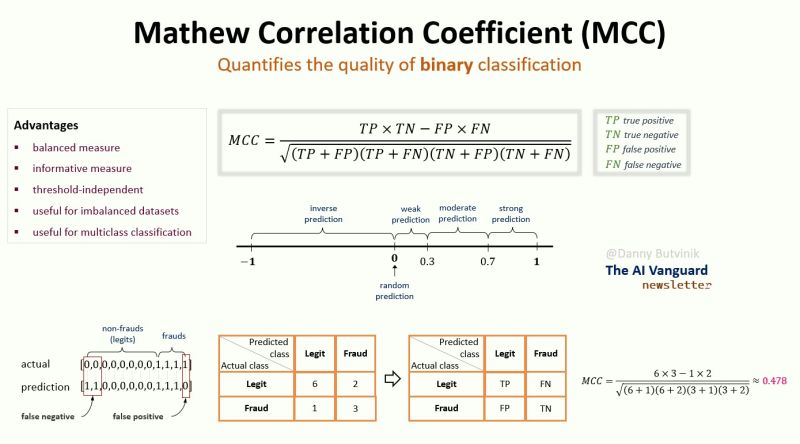

    
      

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Loading  Dataset ♒🌊</h1>  
     
</div>

In [5]:
df_train=pd.read_csv("../data/train.csv", index_col='id')
df_test=pd.read_csv("../data/test.csv", index_col='id')
# df_sub=pd.read_csv("../data/sample_submission.csv")

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Check </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> on Data  📊</span> 
</p>

In [4]:
df_train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [6]:
df_test.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [7]:
df_test.shape,df_train.shape

((2077964, 20), (3116945, 21))

In [ ]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Checking  </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Distribution of catrgorical features  📊</span> 
</p>

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


In [10]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

class: 2 unique values
cap-shape: 74 unique values
cap-surface: 83 unique values
cap-color: 78 unique values
does-bruise-or-bleed: 26 unique values
gill-attachment: 78 unique values
gill-spacing: 48 unique values
gill-color: 63 unique values
stem-root: 38 unique values
stem-surface: 60 unique values
stem-color: 59 unique values
veil-type: 22 unique values
veil-color: 24 unique values
has-ring: 23 unique values
ring-type: 40 unique values
spore-print-color: 32 unique values
habitat: 52 unique values
season: 4 unique values


589

In [11]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

cap-shape: 62 unique values
cap-surface: 59 unique values
cap-color: 57 unique values
does-bruise-or-bleed: 22 unique values
gill-attachment: 66 unique values
gill-spacing: 35 unique values
gill-color: 56 unique values
stem-root: 31 unique values
stem-surface: 54 unique values
stem-color: 55 unique values
veil-type: 15 unique values
veil-color: 23 unique values
has-ring: 23 unique values
ring-type: 36 unique values
spore-print-color: 33 unique values
habitat: 39 unique values
season: 4 unique values


59

In [12]:
df_test.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [13]:
df_train.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [15]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,3116941.0,6.309848,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,11.153785,8.095477,0.00,4.97,9.65,15.63,102.90


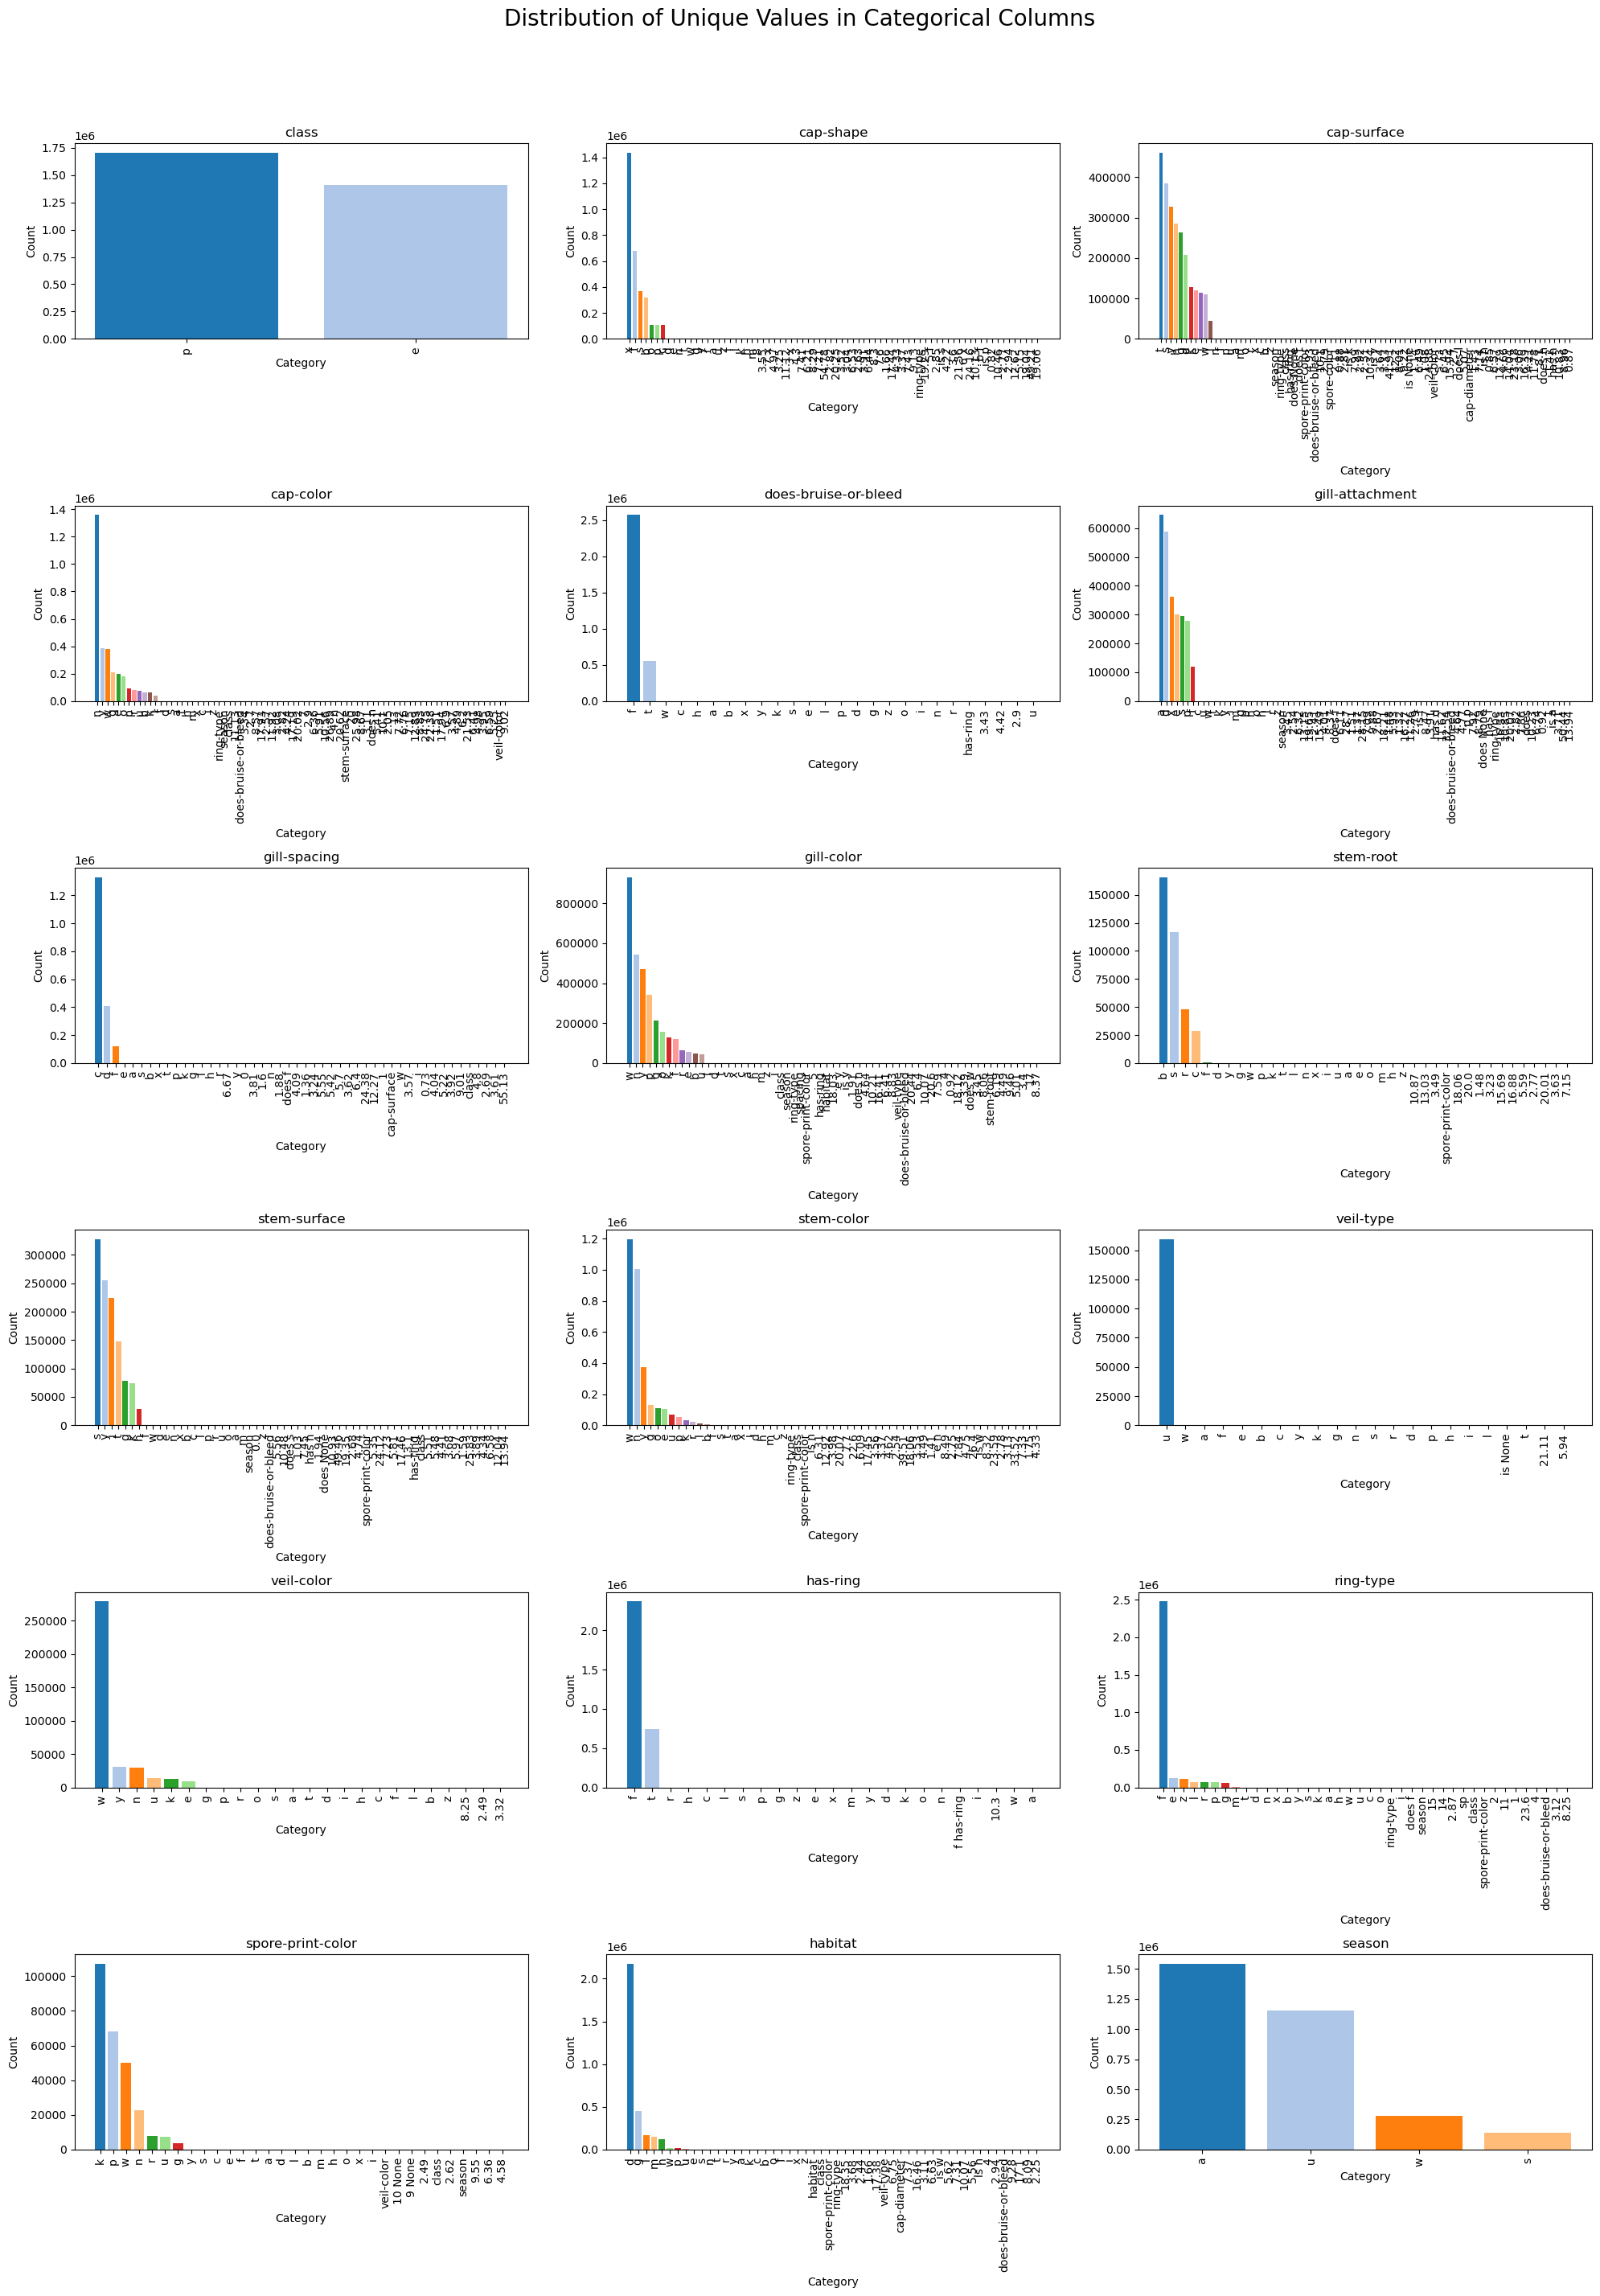

In [16]:
import math
categorical_columns = df_train.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
fig.suptitle('Distribution of Unique Values in Categorical Columns', fontsize=20)

for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_pos = i % n_cols
    value_counts = df_train[col].value_counts()    
    axs[row, col_pos].bar(value_counts.index, value_counts.values, color=plt.cm.tab20.colors)
    axs[row, col_pos].set_title(col)
    axs[row, col_pos].tick_params(axis='x', rotation=90)
    axs[row, col_pos].set_ylabel('Count')
    axs[row, col_pos].set_xlabel('Category')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flat[j])
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    



<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: black; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Exploratory</span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Data Analysis(EDA)  📊</span> 
</p>

In [17]:
import seaborn as sns

In [18]:
missing_train = df_train.isnull().mean() * 100
missing_test = df_test.isnull().mean() * 100

print("Columns in df_train with more than 10% missing values:")
print(missing_train[missing_train > 10])

print("\nColumns in df_test with more than 10% missing values:")
print(missing_test[missing_test > 10])

Columns in df_train with more than 10% missing values:
cap-surface          21.528227
gill-attachment      16.809280
gill-spacing         40.373988
stem-root            88.452732
stem-surface         63.551362
veil-type            94.884350
veil-color           87.936970
spore-print-color    91.425482
dtype: float64

Columns in df_test with more than 10% missing values:
cap-surface          21.506821
gill-attachment      16.834796
gill-spacing         40.404694
stem-root            88.452543
stem-surface         63.595327
veil-type            94.878689
veil-color           87.880445
spore-print-color    91.417224
dtype: float64


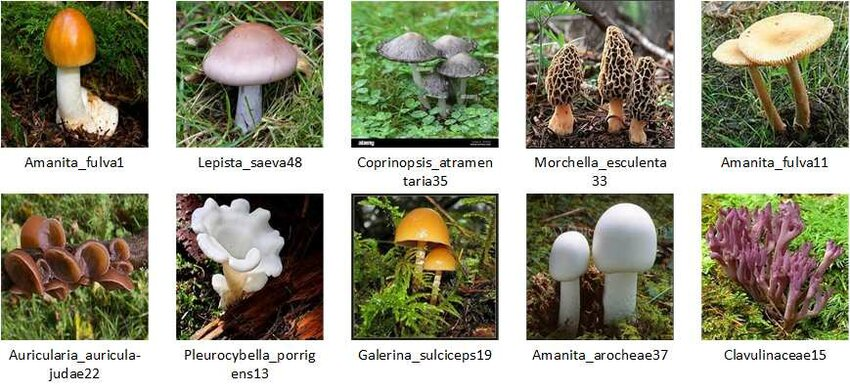

In [19]:
cols_to_drop_train = missing_train[missing_train > 95].index
cols_to_drop_test = missing_test[missing_test > 95].index

df_train = df_train.drop(columns=cols_to_drop_train)
df_test = df_test.drop(columns=cols_to_drop_test)
gc.collect()

60

In [17]:
#num_cols = df_train.select_dtypes(include=['float64']).columns
#df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())
#df_test[num_cols] = df_test[num_cols].fillna(df_test[num_cols].median())

cat_cols_train = df_train.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']

for col in cat_cols_train:
    most_frequent_value_train = df_train[col].mode()[0]
    df_train[col].fillna(most_frequent_value_train, inplace=True)
cat_cols_test = df_test.select_dtypes(include=['object']).columns
cat_cols_common = [col for col in cat_cols_train if col in cat_cols_test]
for col in cat_cols_common:
    most_frequent_value_train = df_train[col].mode()[0]
    df_test[col].fillna(most_frequent_value_train, inplace=True)

In [18]:
df_train.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [19]:
df_test.dtypes

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

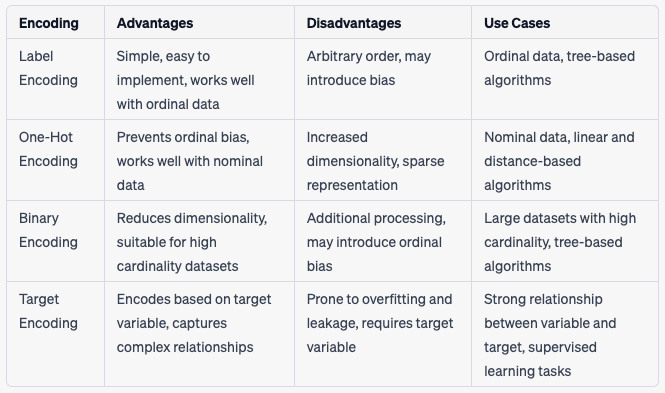

In [20]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols_train = df_train.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train[cat_cols_train] = ordinal_encoder.fit_transform(df_train[cat_cols_train].astype(str))
df_test[cat_cols_train] = ordinal_encoder.transform(df_test[cat_cols_train].astype(str))


In [21]:
df_train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,53.0,73.0,73.0,8.0,44.0,28.0,60.0,4.51,...,27.0,48.0,56.0,15.0,15.0,5.0,18.0,21.0,25.0,0.0
1,p,4.51,72.0,56.0,65.0,8.0,44.0,28.0,46.0,4.79,...,27.0,59.0,48.0,15.0,15.0,19.0,40.0,21.0,25.0,3.0
2,e,6.94,53.0,73.0,49.0,8.0,76.0,28.0,60.0,6.85,...,27.0,52.0,46.0,15.0,15.0,5.0,18.0,21.0,36.0,3.0
3,e,3.88,53.0,82.0,57.0,8.0,71.0,41.0,37.0,4.16,...,27.0,48.0,56.0,15.0,15.0,5.0,18.0,21.0,25.0,2.0
4,e,5.85,72.0,65.0,75.0,8.0,47.0,41.0,60.0,3.37,...,27.0,48.0,56.0,15.0,15.0,5.0,18.0,21.0,29.0,0.0


In [22]:
df_test.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,72.0,68.0,63.0,21.0,65.0,41.0,60.0,11.13,17.12,15.0,48.0,56.0,20.0,22.0,19.0,19.0,21.0,25.0,0.0
1,6.90,64.0,77.0,65.0,8.0,65.0,28.0,62.0,1.27,10.75,27.0,48.0,46.0,15.0,15.0,5.0,18.0,21.0,25.0,0.0
2,2.00,48.0,55.0,63.0,8.0,65.0,28.0,46.0,6.18,3.14,27.0,48.0,46.0,15.0,15.0,5.0,18.0,21.0,25.0,1.0
3,3.47,72.0,77.0,63.0,8.0,71.0,28.0,46.0,4.98,8.51,27.0,48.0,56.0,15.0,14.0,19.0,40.0,21.0,25.0,2.0
4,6.17,72.0,56.0,77.0,8.0,67.0,41.0,62.0,6.73,13.70,27.0,48.0,58.0,15.0,23.0,19.0,26.0,21.0,25.0,2.0


In [23]:
df_train.shape

(3116945, 21)

In [24]:
df_test.shape

(2077964, 20)

In [25]:
df_train['class'].unique()

array(['e', 'p'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [27]:
df_train['class'] = le.fit_transform(df_train['class'])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    


In [28]:
y = df_train['class'] 
X = df_train.drop(['class'],axis=1)

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: cyan; padding: 20px; border-radius: 20px; border: 7px solid #2ca02c; width: 95%;">
  <span style="font-weight: bold; color: #ff7f0e; animation: pulse 2s infinite;"></span>Model Building |
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Training |</span> Classification

</p>

In [29]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =42,stratify=y)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Classification Analysis♒🌊</h1>  
     
</div>

In [30]:
from sklearn.metrics import matthews_corrcoef

In [31]:
def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

# The Optimized Parameter for training Xgboost is referred from here,Thank u rıza temizel
# Please look into his work https://www.kaggle.com/code/rzatemizel/ensemble-lgbm-xgb-catb  :)

In [32]:
from sklearn.metrics import matthews_corrcoef
from xgboost import XGBClassifier
import gc

xgb_optuna_params = {
 #'tree_method': 'gpu_hist',
 'n_estimators': 100,
 'alpha': 2.956752183261538e-04,
 'subsample': 0.83,
 'colsample_bytree': 0.4,
 'max_depth': 15, 
 'min_child_weight': 6,
 'learning_rate': 0.013301,
 'gamma': 5.6e-08,
     #'device': "cuda"
}

gc.collect()
model = XGBClassifier(                    
    #alpha=0.1,                   
    #subsample=0.8,     
    #colsample_bytree=0.6,  
    #objective='binary:logistic',
    #max_depth=14,             
    #min_child_weight=7,         
    #gamma=1e-6,                
    #random_state=42,                 
    #n_estimators=60
    **xgb_optuna_params#device='cuda'
)

XGB = model.fit(
    train_X, 
    train_y, 
    eval_set=[(test_X, test_y)],
    eval_metric=mcc_metric)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67753	validation_0-mcc:0.00000
[1]	validation_0-logloss:0.67188	validation_0-mcc:0.00000
[2]	validation_0-logloss:0.66581	validation_0-mcc:0.00000
[3]	validation_0-logloss:0.66028	validation_0-mcc:0.00000
[4]	validation_0-logloss:0.65223	validation_0-mcc:0.00000
[5]	validation_0-logloss:0.64295	validation_0-mcc:0.00000
[6]	validation_0-logloss:0.63494	validation_0-mcc:0.17563
[7]	validation_0-logloss:0.62510	validation_0-mcc:0.32627
[8]	validation_0-logloss:0.61702	validation_0-mcc:0.48403
[9]	validation_0-logloss:0.61047	validation_0-mcc:0.58452
[10]	validation_0-logloss:0.60174	validation_0-mcc:0.68310
[11]	validation_0-logloss:0.59412	validation_0-mcc:0.75863
[12]	validation_0-logloss:0.58468	validation_0-mcc:0.83428
[13]	validation_0-logloss:0.57607	validation_0-mcc:0.87666
[14]	validation_0-logloss:0.56778	validation_0-mcc:0.90866
[15]	validation_0-logloss:0.56289	validation_0-mcc:0.91406
[16]	validation_0-logloss:0.55535	validation_0-mcc:0.93105
[17]	va

In [33]:
y_pred = XGB.predict(test_X)

In [34]:
score = matthews_corrcoef(test_y, y_pred)
print('MCC:', score)

MCC: 0.9839976845554566


In [35]:
test_pred_prob = XGB.predict(df_test)

In [36]:
test_pred_prob

array([0, 1, 1, ..., 1, 0, 0])

In [37]:
#test_pred_binary = (test_pred_prob > 0.5).astype(int)

test_pred_class = le.inverse_transform(test_pred_prob)

In [38]:
df_sub['class']= test_pred_class

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [39]:
df_sub.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


<Axes: >

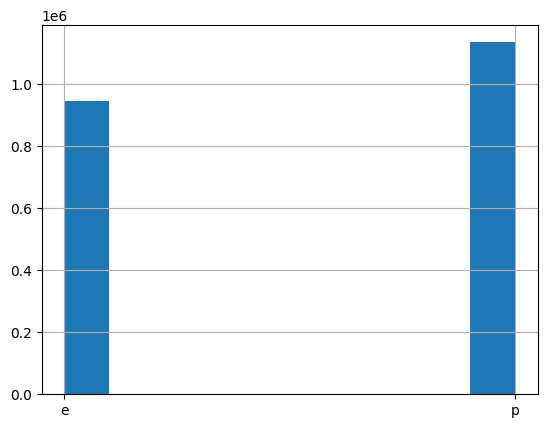

In [40]:
df_sub['class'].hist()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡Refrences :</font></h3>

# Xgboost Paramter are taken from here, Thank u Riza
# https://www.kaggle.com/code/rzatemizel/ensemble-lgbm-xgb-catb  

<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: white; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.                    
            </div>
        </div>
    </center>
</div>